In [1]:
import pandas as pd
pd.set_option('display.max_column', 250)
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-notebook')
from matplotlib import rcParams
rcParams['figure.figsize'] = (5, 3)
rcParams['figure.dpi'] = 150

In [2]:
import arff
data = arff.load(open('../data/covtypeNorm.arff'))
cnames = [i[0] for i in data['attributes']]
df = pd.DataFrame(data['data'], columns=cnames)
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
0,0.368684,0.141667,0.045455,0.184681,0.223514,0.071659,0.870079,0.913386,0.582677,0.875366,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,0.365683,0.155556,0.030303,0.151754,0.215762,0.054798,0.866142,0.925197,0.594488,0.867838,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,0.472736,0.386111,0.136364,0.191840,0.307494,0.446817,0.921260,0.937008,0.531496,0.853339,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,0.463232,0.430556,0.272727,0.173228,0.375969,0.434172,0.937008,0.937008,0.480315,0.865886,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,0.368184,0.125000,0.030303,0.109520,0.222222,0.054939,0.866142,0.921260,0.590551,0.860449,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [3]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,0.550458,0.432380,0.213693,0.192862,0.283487,0.330216,0.835221,0.879208,0.561135,0.276076
std,0.140062,0.310871,0.113458,0.152147,0.075317,0.219089,0.105393,0.077830,0.150687,0.184608
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.475238,0.161111,0.136364,0.077309,0.232558,0.155403,0.779528,0.838583,0.468504,0.142758
50%,0.568784,0.352778,0.196970,0.156049,0.262274,0.280596,0.858268,0.889764,0.562992,0.238394
75%,0.652326,0.722222,0.272727,0.274875,0.312661,0.467613,0.909449,0.933071,0.661417,0.355500
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.groupby('class')['class'].count()

class
1    211840
2    283301
3     35754
4      2747
5      9493
6     17367
7     20510
Name: class, dtype: int64

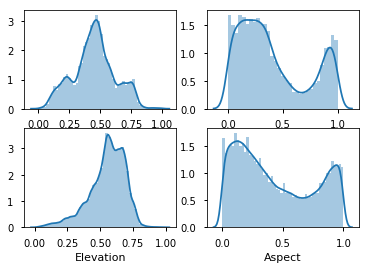

In [5]:
f, axes = plt.subplots(2, 2)

for i in range(2):
    sns.distplot(df.iloc[:25000,i], ax=axes[0,i])
    sns.distplot(df.iloc[25000:,i], ax=axes[1,i])

In [6]:
len(df.columns)

55

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
Elevation                             581012 non-null float64
Aspect                                581012 non-null float64
Slope                                 581012 non-null float64
Horizontal_Distance_To_Hydrology      581012 non-null float64
Vertical_Distance_To_Hydrology        581012 non-null float64
Horizontal_Distance_To_Roadways       581012 non-null float64
Hillshade_9am                         581012 non-null float64
Hillshade_Noon                        581012 non-null float64
Hillshade_3pm                         581012 non-null float64
Horizontal_Distance_To_Fire_Points    581012 non-null float64
Wilderness_Area1                      581012 non-null object
Wilderness_Area2                      581012 non-null object
Wilderness_Area3                      581012 non-null object
Wilderness_Area4                      581012 non-null object
Soil_Type1               

In [8]:
for i in df:
    print(i, df[i].nunique())

Elevation 1978
Aspect 361
Slope 67
Horizontal_Distance_To_Hydrology 551
Vertical_Distance_To_Hydrology 700
Horizontal_Distance_To_Roadways 5785
Hillshade_9am 207
Hillshade_Noon 185
Hillshade_3pm 255
Horizontal_Distance_To_Fire_Points 5827
Wilderness_Area1 2
Wilderness_Area2 2
Wilderness_Area3 2
Wilderness_Area4 2
Soil_Type1 2
Soil_Type2 2
Soil_Type3 2
Soil_Type4 2
Soil_Type5 2
Soil_Type6 2
Soil_Type7 2
Soil_Type8 2
Soil_Type9 2
Soil_Type10 2
Soil_Type11 2
Soil_Type12 2
Soil_Type13 2
Soil_Type14 2
Soil_Type15 2
Soil_Type16 2
Soil_Type17 2
Soil_Type18 2
Soil_Type19 2
Soil_Type20 2
Soil_Type21 2
Soil_Type22 2
Soil_Type23 2
Soil_Type24 2
Soil_Type25 2
Soil_Type26 2
Soil_Type27 2
Soil_Type28 2
Soil_Type29 2
Soil_Type30 2
Soil_Type31 2
Soil_Type32 2
Soil_Type33 2
Soil_Type34 2
Soil_Type35 2
Soil_Type36 2
Soil_Type37 2
Soil_Type38 2
Soil_Type39 2
Soil_Type40 2
class 7


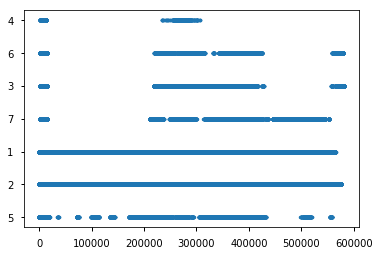

In [13]:
plt.plot(df.index.sort_values(), df['class'], '.')